In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pybuoy as pb

C:\Users\twhes\AppData\Local\Temp\ipykernel_6316\3574232367.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
pb.storm_search

<function pybuoy.storm_finder.storm_search(data, thresh, dur, end_thresh, end_dur)>

In [ ]:
med = phi2mm(3)
strs_thresh=stress_thresh(med)
rgh = 2.5*.001*phi2mm(1.7)

strs = ob27.waves.rep_cur_stress(ob27.currents.j[0,:]
                          ,ob27.currents.i[0,:]/100,
                          5,30,rgh)
# n = storm_classes
wvstorm_table,wv_storms = pb.wvstorm_table(ob27,strs,strs_thresh,24
                                           ,strs_thresh,12,fps,
                                           roughness=rgh
                                          )#,storm_names=n)

In [ ]:
 buoy_box = pn.widgets.Select(name='Mooring',value = '41013',options = list(station_map.keys()))
  dtype_box = pn.widgets.Select(name='Data Type',value = 'Sig. Wave Height',options =[lab_map[k] for k in lab_map.keys()])
  event_box = pn.widgets.Select(name='Event',value = 'Florence',options = list(event_map.keys()))
  
  dash = pn.bind(disp_buoy,dtype=dtype_box,station=buoy_box,event=event_box)


  col = pn.Column(event_box,buoy_box,dtype_box,dash).servable(target='buoy_app')

In [ ]:
N_hrs = 24*365*8+24*2

In [ ]:
storm_classes = np.array(pb.warner_class(ob27,wv_storms,1020,window=28))
storm_classes[[1,5,7,8,9,13,16,18,19,23,33,40,46,51,59,61,66,71,73]] = 'low press'
storm_classes[[34,41,43,57,74]] = 'cold'
storm_classes[[69,72]] = 'warm'
storm_classes[[2,45,56]] = 'unknown'
storm_classes[:5]

In [13]:
ints = np.array(np.array(wvstorm_table)[:,3],dtype=float)
dur = np.array(np.array(wvstorm_table)[:,2],dtype=float)

for stcla in ['low press','cold','warm']:
    print(np.nansum(ints[storm_classes==stcla]),
          np.nansum(dur[storm_classes==stcla]),
         np.nansum(dur[storm_classes==stcla])/N_hrs)

575.5194491453769 1906.0 0.02717887291809263
371.3132443259017 1464.0 0.02087611225188227
146.2451991488789 760.0 0.010837326032397902


In [14]:
wvstorm_table[:10]

,Start Date,Storm Name,Duration (hrs),$\int\tau_{wvs} dt$ (Pa h),Max $\tau_{wvs}$ (Pa),Avg. $u_{br}$ (m/s),Avg. SWH (m),Avg. $T_p$ (s),Avg. MWD (deg),Avg. $\tau_{wnd}$ (Pa),Avg. Wind Dir. (deg)
1,09-12-2018,,120,77.34476,2.83,0.23,3.56,9.28,141.68,0.57,135.91
2,10-26-2012,,92,54.633065,1.35,0.24,3.06,10.34,109.95,0.63,350.34
3,09-30-2015,,177,54.200152,0.66,0.16,2.63,9.03,107.12,0.2,54.86
4,09-22-2017,,120,50.692951,0.95,0.21,2.29,12.52,121.61,0.15,21.06
5,09-07-2017,,133,43.651128,0.68,0.18,2.52,10.02,113.57,0.26,57.55
6,11-16-2019,,73,40.372639,1.12,0.2,4.42,8.68,89.54,0.59,6.42
7,03-03-2018,,123,38.479923,0.82,0.17,1.89,13.18,107.8,0.14,313.35
8,10-05-2016,,103,33.14657,1.06,0.16,2.97,8.21,97.64,0.46,49.1
9,09-04-2019,,53,31.532762,1.27,0.24,3.36,9.63,174.37,0.7,91.66
10,09-16-2017,,93,27.329937,0.47,0.17,1.91,12.17,117.86,0.09,5.94


In [15]:
(len([1,7,8,9,13,16,18,19,23,33,40,46,51,59,61,66,71,73])+5+2+3)/76 -1

-0.631578947368421

In [16]:
tab_data = np.array(wvstorm_table[:5])
poster_table = np.zeros((5,6),dtype=object)
poster_table[:,3] = np.around(np.array(tab_data[:,3],dtype=float),2)
poster_table[:,[0,4,5]] = tab_data[:,[0,4,2]]
classes = ['Low-Pressure','Low-Pressure','Unknown','Low-Pressure','Cold Front']
names   = ['Hurricane Florence','Hurricane Sandy','N.A Storm Complex',
           'Hurricane Maria','Unnamed']
poster_table[:,1] = names
poster_table[:,2] = classes

In [17]:
df = pd.DataFrame(poster_table)
df.columns = ['Start Date','Storm Name','Classification',
              r'$\int\tau_b$dt (Pa hrs)','Peak $\tau_b$ (Pa)','Duration (hrs)']
df.index = np.linspace(1,5,5,dtype=int)
df

,Start Date,Storm Name,Classification,$\int\tau_b$dt (Pa hrs),Peak $\tau_b$ (Pa),Duration (hrs)
1,09-12-2018,Hurricane Florence,Low-Pressure,77.34,2.83,120
2,10-26-2012,Hurricane Sandy,Low-Pressure,54.63,1.35,92
3,09-30-2015,N.A Storm Complex,Unknown,54.2,0.66,177
4,09-22-2017,Hurricane Maria,Low-Pressure,50.69,0.95,120
5,09-07-2017,Unnamed,Cold Front,43.65,0.68,133


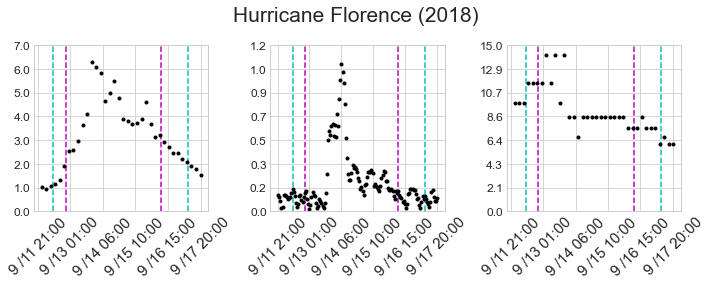

In [18]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
fmt = lambda stamp : stamp[6:7] + ' /' + stamp[8:10] +' '+ stamp[-2:] + ':00'
strm = [wv_storms[0][0]-12,wv_storms[0][1]+12]

length = strm[1] - strm[0]
heights = [8,3,16]
ylims = []
    
# find index for D_50 mobilization
s = strs[strm[0]:strm[1]]
idx_map = np.linspace(0,len(s)-1,len(s),dtype=int)
idx_map[s>stress_thresh(phi2mm(1.7))] = -1
start = list(idx_map).index(-1)+1
end = len(s)-list(idx_map[::-1]).index(-1)

Nticks = 6
ticks = np.linspace(0,len(ob27.waves.swh[strm[0]:strm[1]])-1,Nticks,dtype=int)
labs  = list(map(fmt,ob27.timestamps[strm[0]:strm[1]][ticks]))
ylims = [7,1.2,15]
for k in range(3):
    ax[k].set_xticks(ticks,labels=labs,rotation = 45,fontsize=15)
    ax[k].plot([13]*heights[k],range(heights[k]),'c--')
    ax[k].plot([length-12]*heights[k],range(heights[k]),'c--')
    ax[k].plot([start]*heights[k],range(heights[k]),'m--')
    ax[k].plot([end]*heights[k],range(heights[k]),'m--')
    ax[k].set_ylim(0,ylims[k])
    
    
title_fs = 15
ax[0].plot(ob27.waves.swh[strm[0]:strm[1]],'k.')
ax[1].plot(ob27.currents.i[0,:][strm[0]:strm[1]]/100,'k.')
ax[2].plot(ob27.waves.Tp[strm[0]:strm[1]],'k.')

titles = [r'Sig. Wave Height (m)','Near Bottom Currents (m/s)','Peak Period (s)']
# for i in range(3):
#     ax[i].set_title(titles[i],fontsize=title_fs)
    
ytick_fs = 12
ax[0].set_yticks(np.linspace(0,7,8),labels=np.linspace(0,7,8),fontsize=ytick_fs)
ax[1].set_yticks(np.linspace(0,1.2,8),labels=np.around(np.linspace(0,1.2,8),1),fontsize=ytick_fs)
ax[2].set_yticks(np.linspace(0,15,8),labels=np.around(np.linspace(0,15,8),1),fontsize=ytick_fs)


fig.suptitle('Hurricane Florence (2018)',fontsize=21)
fig.tight_layout()

C:\Users\twhes\AppData\Local\Temp/ipykernel_10084/3385661663.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cool),


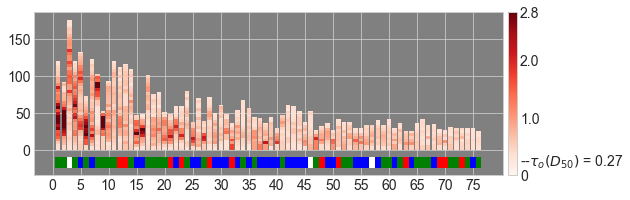

In [181]:
fig,ax = plt.subplots(1,figsize=(10,3))
i= 1
cool = plt.cm.get_cmap('Reds')
for strm in wv_storms[:-2]:
    s = strs[strm[0]:strm[1]]
    cmap = np.zeros_like(s)
    cmap[s>stress_thresh(phi2mm(1.7))] = 1
    first_non_nan = list(np.isnan(s)).index(False)
    last = cool(s[first_non_nan])
    t=0
    while t < len(s):
        if np.isnan(s[t]) == True:
            ax.bar(i,1,bottom = t,color=last)
            t+=1
        else:
            c = 'c' if cmap[t] == 0 else 'm'
            last = cool(s[t])
            ax.bar(i,1,bottom = t,color=cool(s[t]))
            t+=1
    i += 1
    
norm = mpl.colors.Normalize(vmin=0,vmax=np.nanmax(strs))

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cool),
                    pad=.01,
                   )
cbar.ax.set_yticks([0,stress_thresh(phi2mm(1.7)),1,2,np.nanmax(strs)],
                   labels = [0,r'--$\tau_o(D_{50})$ = 0.27',1.0,2.0,np.around(np.nanmax(strs),1)],
                  fontsize=14)

class_dict = {'warm':'r','cold':'b','low press':'g','unknown':'w'}
for i in range(len(storm_classes[:-2])):
    ax.bar(i+1,-15,color=class_dict[storm_classes[i]],bottom=-10,width=1)
ax.set_yticks([0,50,100,150],labels=[0,50,100,150],fontsize=14)
ax.set_xticks(np.linspace(0,75,16),labels=np.linspace(0,75,16,dtype=int),fontsize=14)
ax.set_facecolor('gray')

fig.savefig('Events.png',dpi=400)

In [134]:
for a in ['low press','warm','cold','unknown']:
    N = list(storm_classes[:-2]).count(a)
    print(a,N,N/len(storm_classes)*100)

low press 31 39.743589743589745
warm 12 15.384615384615385
cold 30 38.46153846153847
unknown 3 3.8461538461538463


In [39]:
ob27.timestamps

array(['2012-01-01-00', '2012-01-01-01', '2012-01-01-02', ...,
       '2021-12-31-21', '2021-12-31-22', '2021-12-31-23'], dtype=object)

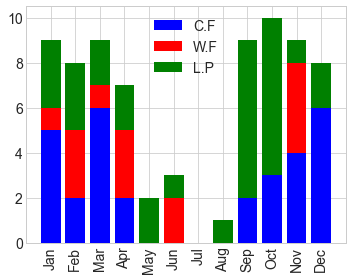

In [87]:
counts = {'cold':[0 for i in range(12)],
          'warm':[0 for i in range(12)],
          'low press':[0 for i in range(12)],
           'unknown':[0 for i in range(12)]}
yr_count = [0 for i in range(10)]
fig,ax = plt.subplots(1,figsize=(5,4))
months = list(map(lambda stamp : int(stamp[5:7]),ob27.timestamps))
years = list(map(lambda stamp : int(stamp[2:4]),ob27.timestamps))
labs = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
i=0
for strm in wv_storms:
    
    mon = months[strm[0]]
    yr =  years[strm[0]]
    clas = storm_classes[i]
    yr_count[yr-11] +=1
    counts[clas][mon-1] +=1

    i+=1
    
ax.bar(range(12),counts['cold'],color='b',label='C.F')
ax.bar(range(12),counts['warm'],bottom=counts['cold'],color='r',label='W.F')
ax.bar(range(12),counts['low press'],bottom=
        np.array(counts['warm'])+np.array(counts['cold']),color='g',label='L.P')
# ax.bar(range(12),counts['unknown'],bottom=
#         np.array(counts['low press'])+np.array(counts['cold'])+np.array(counts['cold']),color='gray',label='Unknown')
ax.legend(fontsize=14,loc='upper center')

ax.set_xticks(range(12),labels=labs,fontsize=14,rotation=90);
ax.set_yticks(np.linspace(0,10,6),labels=np.linspace(0,10,6,dtype=int),fontsize=14,rotation=0);

# ax.set_title('Event Climatology',fontsize=20)
# ax.set_ylabel('Occurrences',fontsize=15)
fig.tight_layout()

6 2012
12 2013
8 2014
9 2015
14 2016
6 2017
12 2018
11 2019


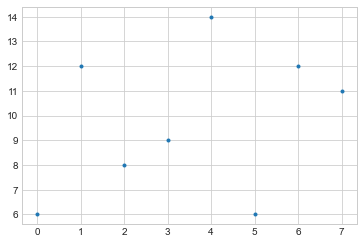

In [124]:
yrs = []
for strm in wv_storms:
    s = ob27.timestamps[strm[0]]
    yrs.append(s[2:4])
    
for yr in np.linspace(12,19,8,dtype=int):
    print(yrs.count(str(yr)),2000+yr)
plt.plot(list(map(lambda i : yrs.count(str(i)),np.linspace(12,19,8,dtype=int))),'.')

([<matplotlib.axis.XTick at 0x1c21aa79c00>,
 [Text(0.0, 0, '2012-01-01-00'),
  Text(21918.0, 0, '2014-07-02-05'),
  Text(43836.0, 0, '2016-12-31-11'),
  Text(65754.0, 0, '2019-07-02-17'),
  Text(87672.0, 0, '2021-12-31-23')])

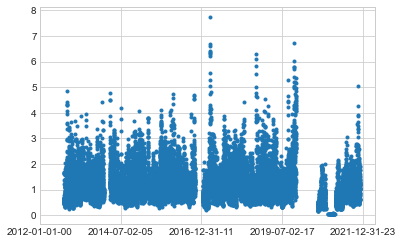

In [76]:
plt.plot(ob27.waves.swh,'.')
plt.xticks(np.linspace(0,len(ob27.waves.swh),5),labels = 
           ob27.timestamps[np.linspace(0,len(ob27.waves.swh)-1,5,dtype=int)])